1) Utilizado YOLO11, com modelo pré-treinado yolo11n.pt - este modelo foi treinado com imagens do dataset COCO.
2) as imagens utilizadas foram do roboflow dataset: cowildlife.
3) foi alterado o yaml do cowildlife (tinha 4 novas classes, nc=4. Mudei para nc=84 - adicionando todas as classes do COCO -> 80 + 4)
4) no dataset cowildlife, todas as IDs das imagens (definidas nos labels) foram alteradas: adicionado 80 (80,81,82,83) para que seguissem a sequencia da classificação do dataset COCO


In [1]:
import torch

In [2]:
torch.__version__

'2.3.0'

In [3]:
torch.cuda.is_available()

True

In [4]:
import ultralytics
from ultralytics import YOLO

In [5]:
ultralytics.checks()

Ultralytics 8.3.28  Python-3.12.7 torch-2.3.0 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
Setup complete  (8 CPUs, 31.8 GB RAM, 335.6/474.7 GB disk)


In [6]:
# carrega modelo e pesos de pre-treinado YOLO
model01 = YOLO("yolo11.yaml").load("yolo11n.pt")


WARNING  no model scale passed. Assuming scale='n'.
Transferred 499/499 items from pretrained weights


In [7]:
# treina modelo usando 'cowildlife.yaml' por 3 epochs
results01 = model01.train(data="datasets/cowildlife84.yaml", epochs=3, batch=-1)

New https://pypi.org/project/ultralytics/8.3.50 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.28  Python-3.12.7 torch-2.3.0 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolo11.yaml, data=datasets/cowildlife84.yaml, epochs=3, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train17, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False,

c:\Users\mario\anaconda3\envs\torchyolo\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


     2630000       6.644         0.237         51.75         221.4        (1, 3, 640, 640)                    list
     2630000       13.29         0.377         53.49           137        (2, 3, 640, 640)                    list
     2630000       26.57         0.644         99.91         132.4        (4, 3, 640, 640)                    list
     2630000       53.15         1.237         168.1         178.8        (8, 3, 640, 640)                    list
     2630000       106.3         2.405         295.5           354       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 14 for CUDA:0 2.50G/4.00G (63%) 


train: Scanning C:\Users\mario\datasets\cowildlife\train\labels... 2505 images, 7 backgrounds, 0 corrupt: 100%|██████████| 2505/2505 [00:01<00:00, 2028.36it/s]


train: New cache created: C:\Users\mario\datasets\cowildlife\train\labels.cache


val: Scanning C:\Users\mario\datasets\cowildlife\valid\labels... 240 images, 1 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<00:00, 1407.32it/s]


val: New cache created: C:\Users\mario\datasets\cowildlife\valid\labels.cache
Plotting labels to runsMD05\detect\train17\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000114, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000546875), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runsMD05\detect\train17
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.38G       1.24      4.948      1.463         35        640:  99%|█████████▉| 178/179 [02:52<00:00,  1.04it/s]c:\Users\mario\anaconda3\envs\torchyolo\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
        1/3      2.38G       1.24      4.944      1.463         34        640: 100%|██████████| 179/179 [02:53<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.51it/s]

                   all        240        273          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.37G      1.208      3.929      1.412         33        640: 100%|██████████| 179/179 [02:50<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]

                   all        240        273    0.00416      0.172    0.00298    0.00215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.36G      1.198      3.046      1.392         30        640: 100%|██████████| 179/179 [02:50<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]

                   all        240        273      0.008     0.0587    0.00696    0.00449



3 epochs completed in 0.149 hours.
Optimizer stripped from runsMD05\detect\train17\weights\last.pt, 5.6MB
Optimizer stripped from runsMD05\detect\train17\weights\best.pt, 5.6MB

Validating runsMD05\detect\train17\weights\best.pt...
WARNING  validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.28  Python-3.12.7 torch-2.3.0 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
YOLO11 summary (fused): 238 layers, 2,622,132 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11%|█         | 1/9 [00:00<00:05,  1.49it/s]c:\Users\mario\anaconda3\envs\torchyolo\Lib\site-packages\ultralytics\utils\plotting.py:1065: RuntimeWarning: invalid value encountered in cast
  for j, box in enumerate(boxes.astype(np.int64).tolist()):
Exception in thread Thread-38 (plot_images):
OverflowError: Python int too large to convert to C long

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\mario\anaconda3\envs\torchyolo\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "c:\Users\mario\anaconda3\envs\torchyolo\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\mario\anaconda3\envs\torchyolo\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\mario\anaconda3\envs\torchyolo\Lib\site-packa

                   all        240        273    0.00802     0.0587    0.00696    0.00448
            black-bear         76         91     0.0291      0.209     0.0147    0.00972
     cottontail-rabbit        112        116      0.003     0.0259    0.00288    0.00209
                 moose         36         42          0          0    0.00326    0.00253
             mule-deer         15         24          0          0    0.00695    0.00358
Speed: 1.3ms preprocess, 19.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runsMD05\detect\train17


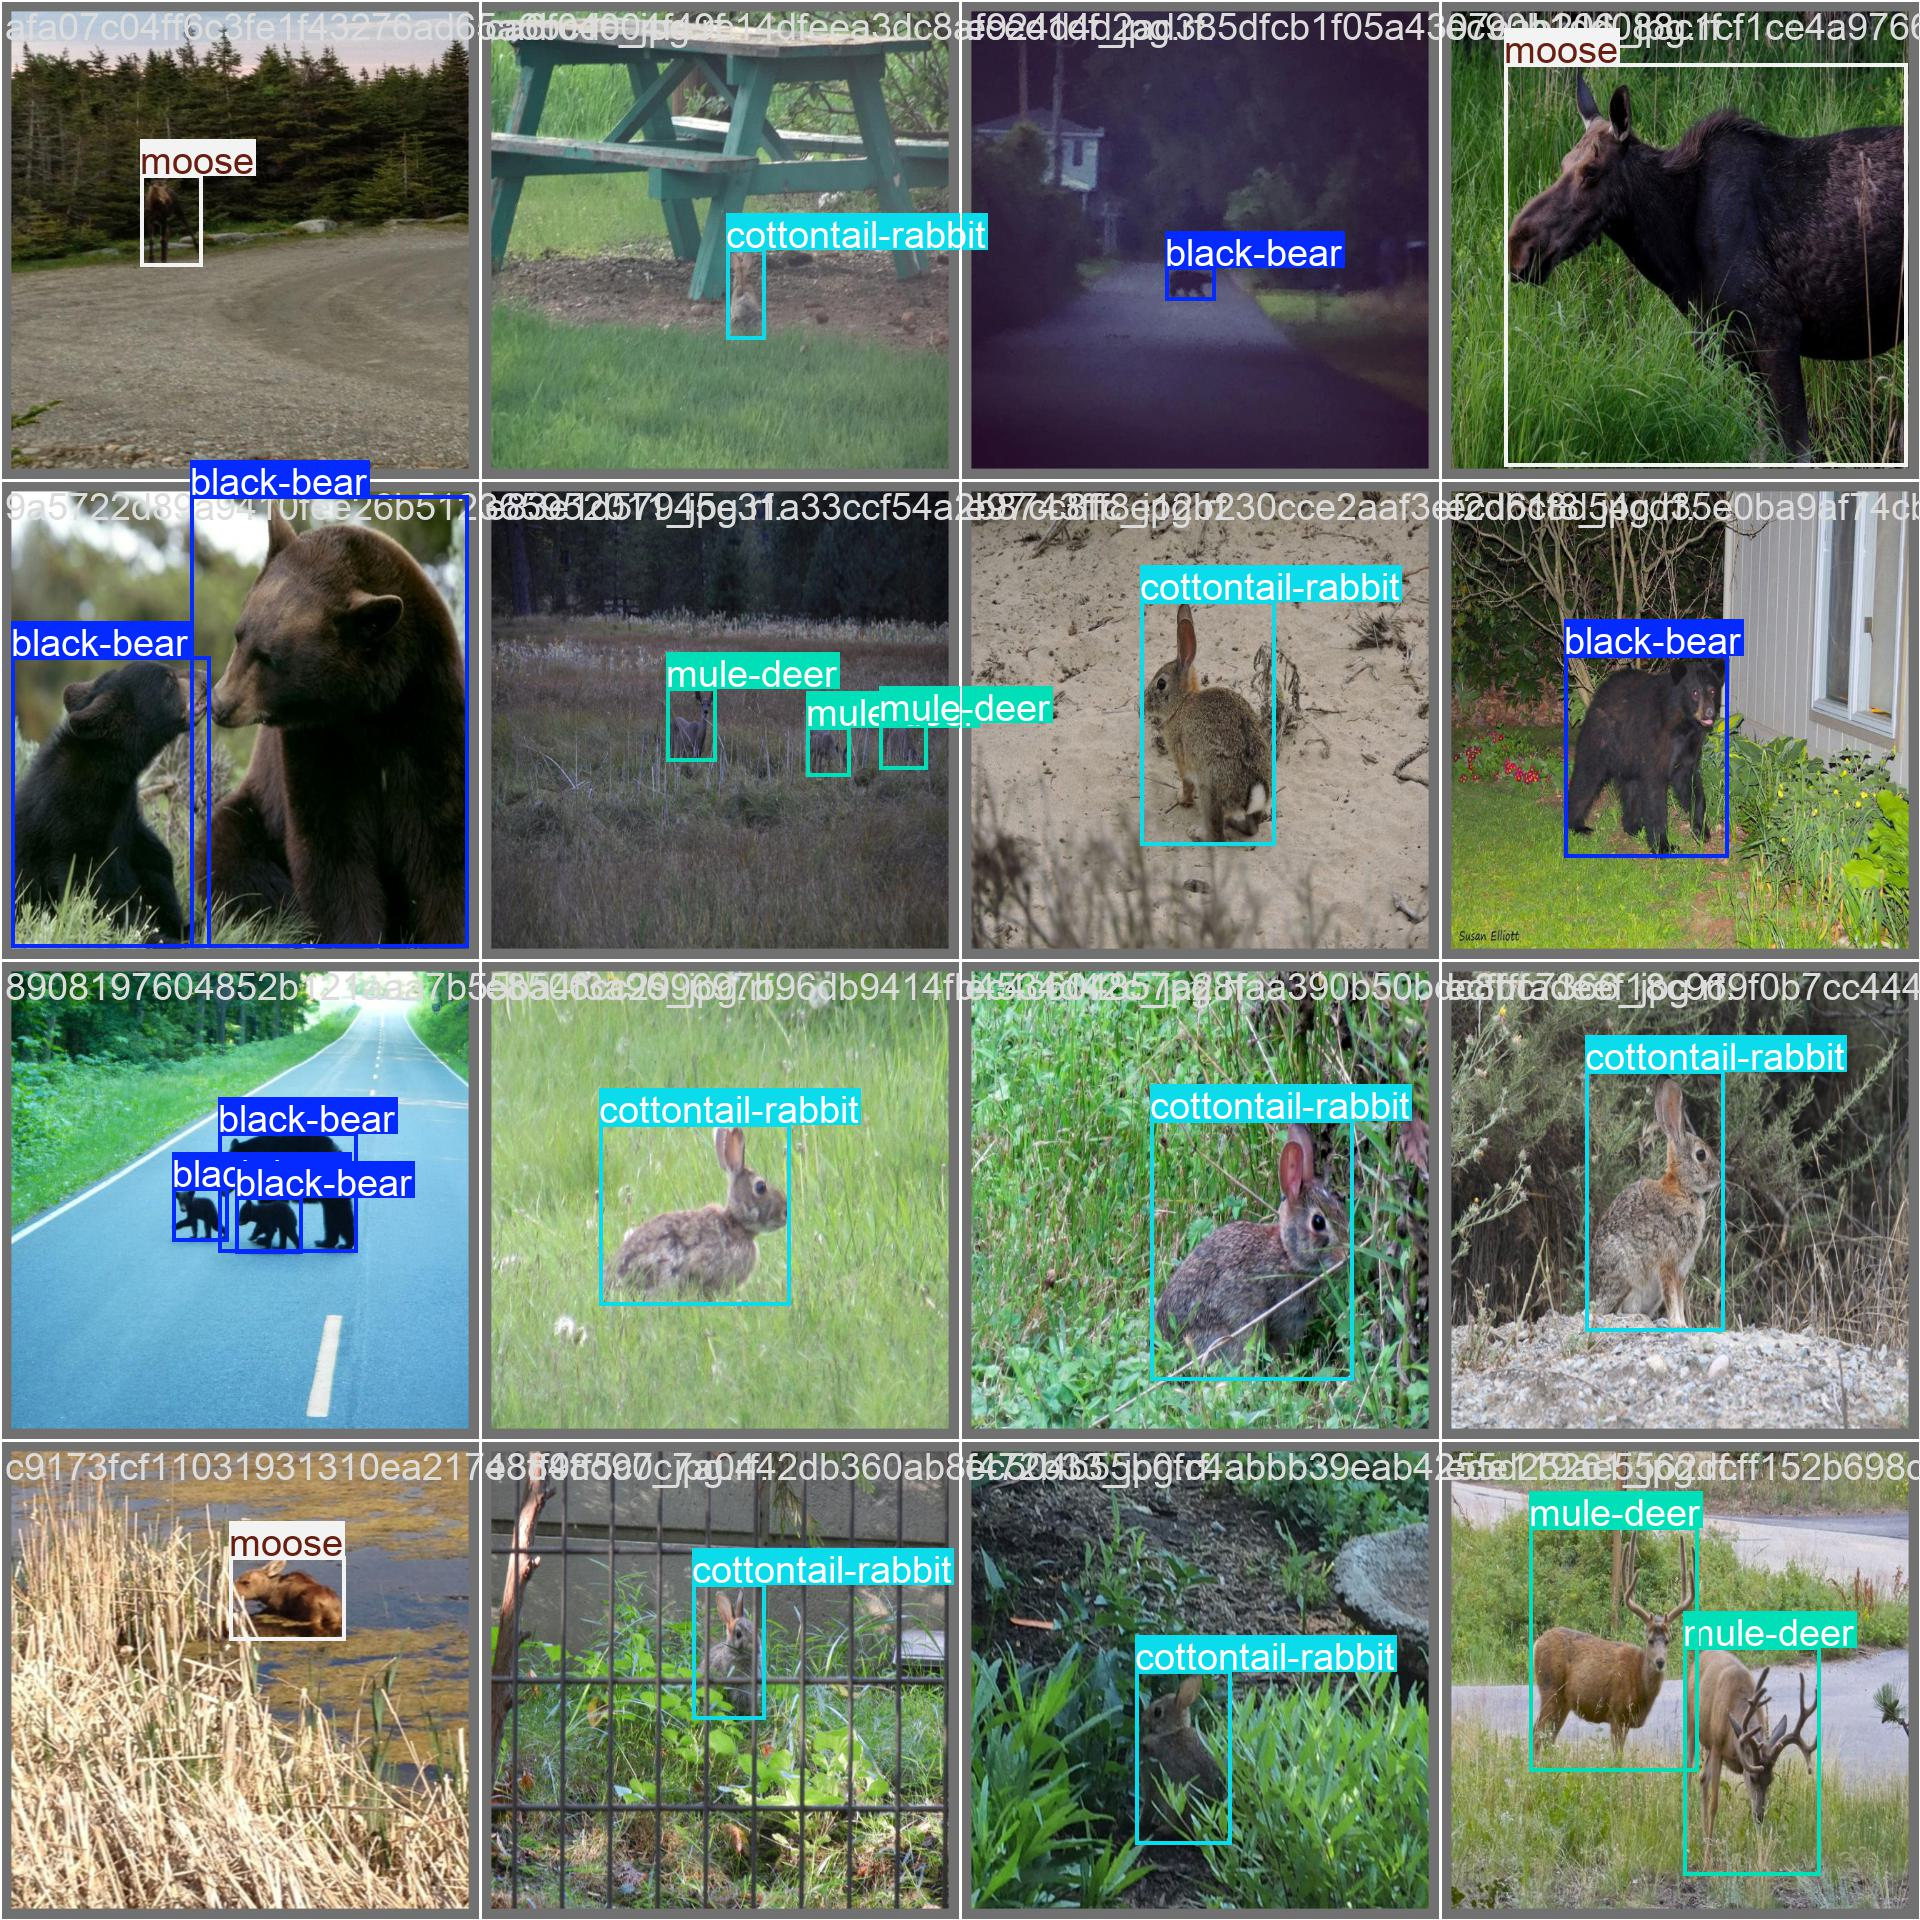

In [15]:
from IPython.display import Image, display # Display an image 
display(Image(filename='runsMD05/detect/train17/val_batch2_labels.jpg'))


image 1/1 c:\Users\mario\ursos.jpg: 640x640 2 black-bears, 81.9ms
Speed: 0.0ms preprocess, 81.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


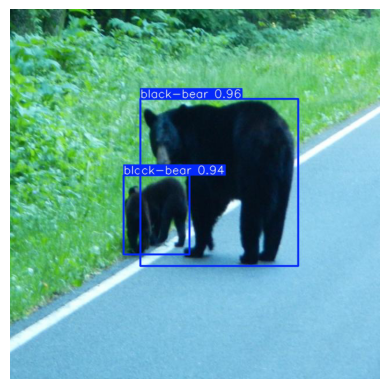

In [31]:
# carrega modelo treinado com novas categorias
model02 = YOLO("runsMD05/detect/train17/weights/best.pt")  # novo modelo treinado
imagem = "ursos.jpg"
results02 = model02(imagem)

# mostra figura analizada
results02[0].show()
results02[0].save(filename="ursos_anotados.jpg")

from PIL import Image
import matplotlib.pyplot as plt

# Open an image file
mostra = Image.open('ursos_anotados.jpg')

# Display the image
plt.imshow(mostra)
plt.axis('off')  # Hide the axis
plt.show()
